In [1]:
#Task-6

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
data = pd.read_csv("disney_plus_titles.csv")

In [4]:
# Set a style
sns.set_style("whitegrid")

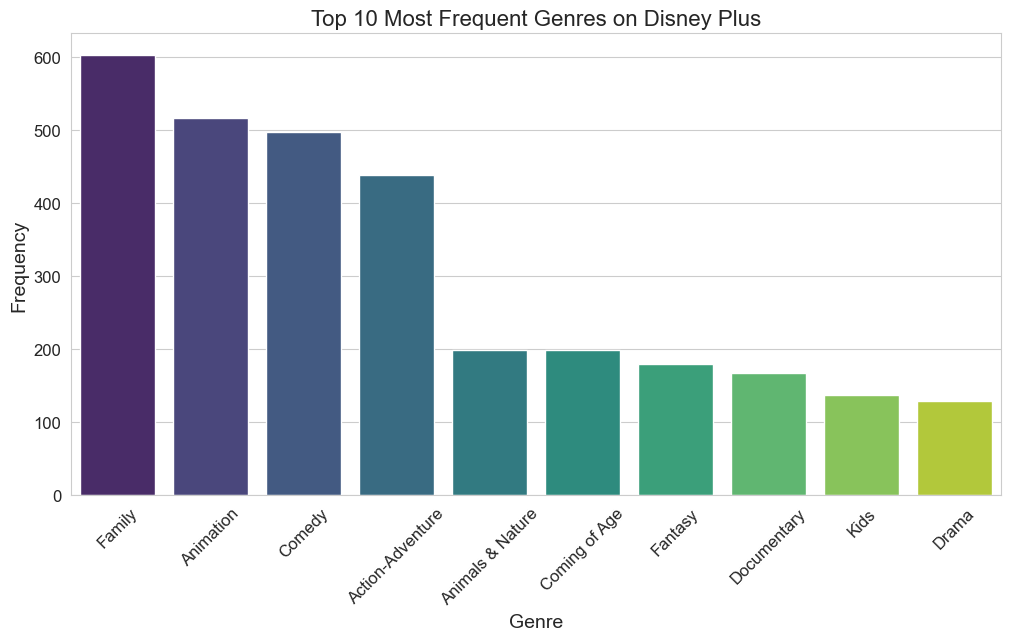

In [5]:
genre_count = data['listed_in'].str.split(', ').explode().value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_count.head(10).index, y=genre_count.head(10).values, hue=genre_count.head(10).index, palette="viridis", dodge=False)
plt.legend([],[], frameon=False)
plt.title('Top 10 Most Frequent Genres on Disney Plus', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

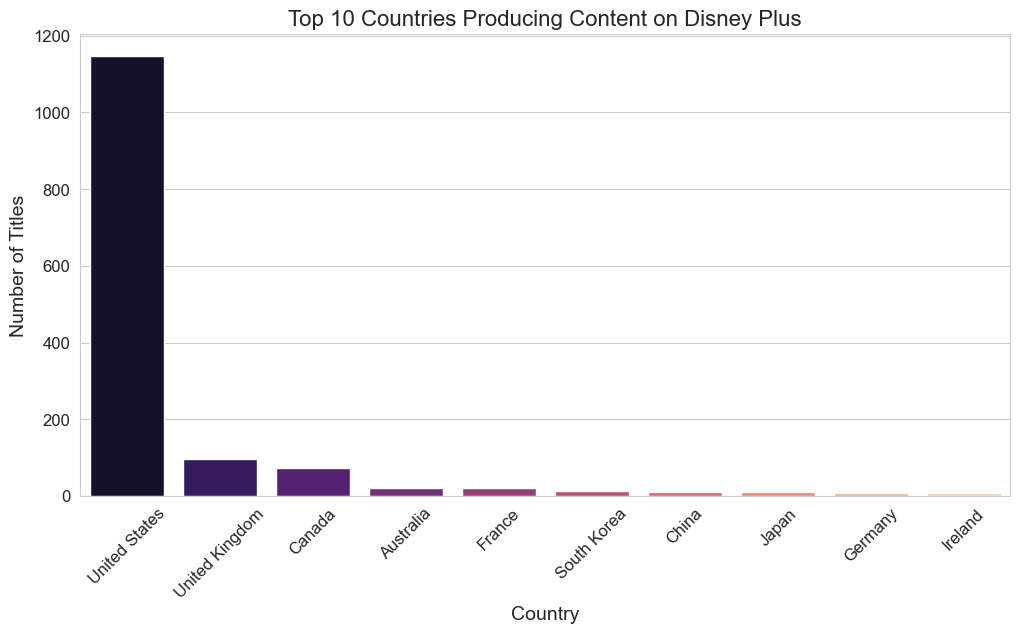

In [9]:
country_genre_count =data['country'].str.split(', ').explode().value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=country_genre_count.head(10).index, y=country_genre_count.head(10).values, hue=country_genre_count.head(10).index, palette="magma", dodge=False)
plt.legend([],[], frameon=False)
plt.title('Top 10 Countries Producing Content on Disney Plus', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Titles', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

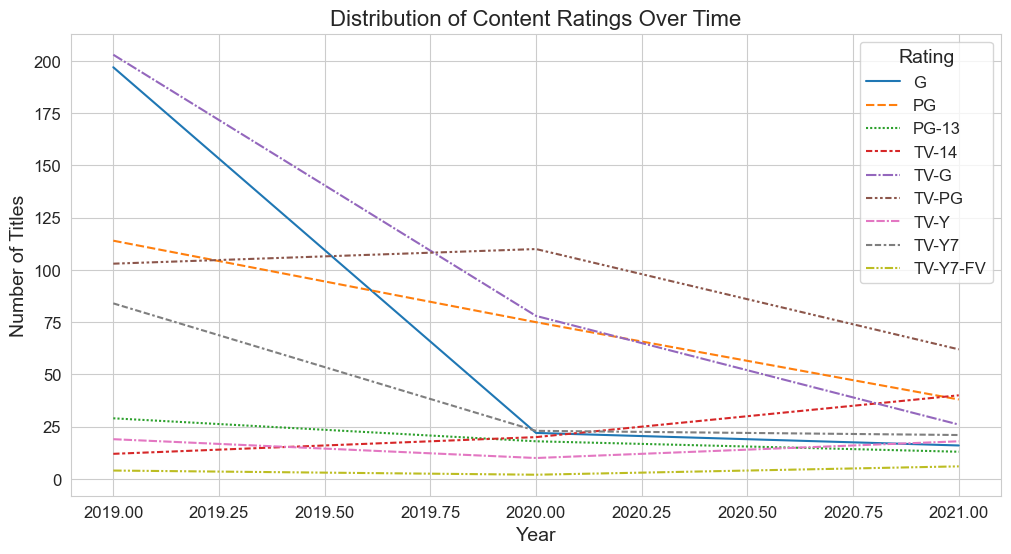

In [10]:
data['date_added'] = pd.to_datetime(data['date_added'])
rating_trend = data.groupby([data['date_added'].dt.year, 'rating']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.lineplot(data=rating_trend)
plt.title('Distribution of Content Ratings Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Titles', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Rating', fontsize=12, title_fontsize=14)
plt.show()

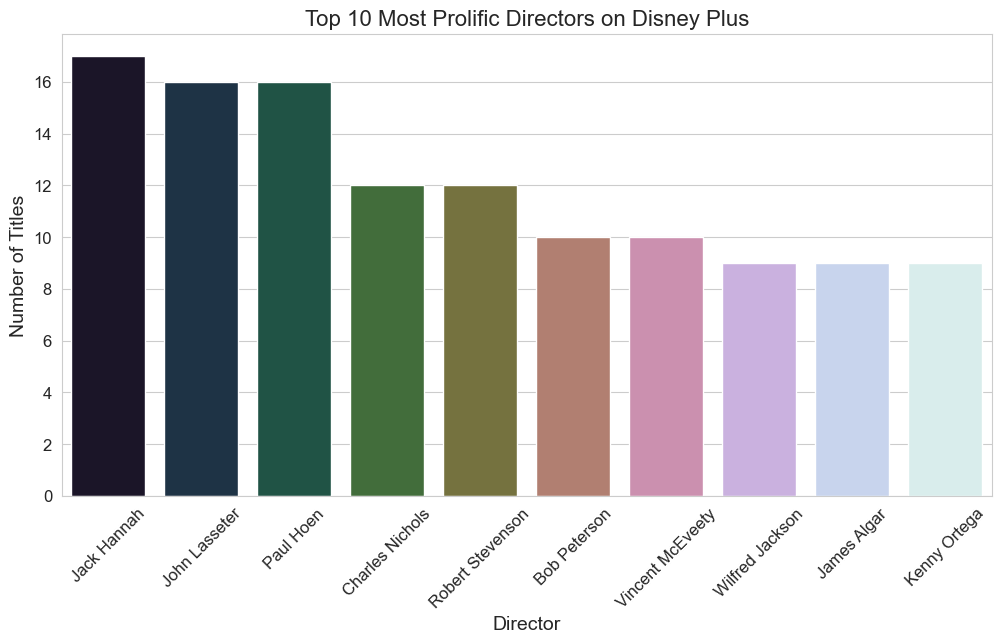

In [11]:
director_count = data['director'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=director_count.index, y=director_count.values, hue=director_count.index, palette="cubehelix", dodge=False)
plt.legend([],[], frameon=False)
plt.title('Top 10 Most Prolific Directors on Disney Plus', fontsize=16)
plt.xlabel('Director', fontsize=14)
plt.ylabel('Number of Titles', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

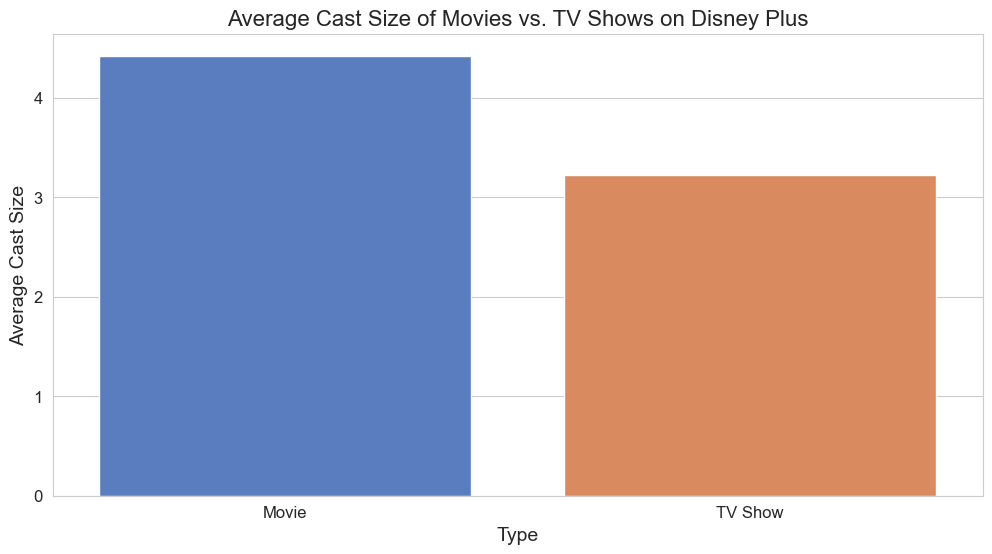

In [12]:
data['cast_size'] = data['cast'].apply(lambda x: len(x.split(', ')) if pd.notnull(x) else 0)
cast_size_distribution = data.groupby('type')['cast_size'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=cast_size_distribution.index, y=cast_size_distribution.values, hue=cast_size_distribution.index, palette="muted", dodge=False)
plt.legend([],[], frameon=False)
plt.title('Average Cast Size of Movies vs. TV Shows on Disney Plus', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Average Cast Size', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

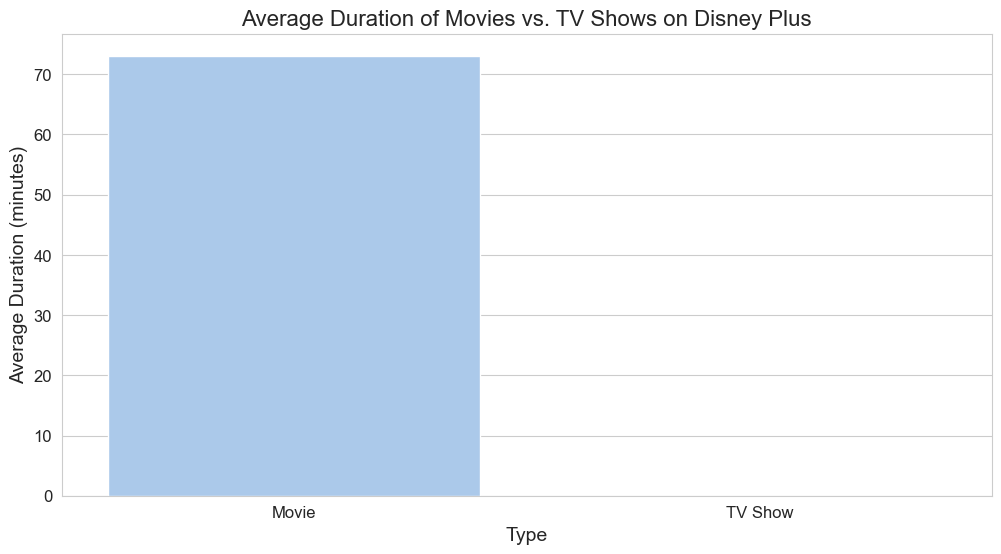

In [13]:
data['duration_minutes'] = data['duration'].apply(lambda x: int(x.split()[0]) if 'min' in x else None)
average_duration = data.groupby('type')['duration_minutes'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=average_duration.index, y=average_duration.values, hue=average_duration.index, palette="pastel", dodge=False)
plt.legend([],[], frameon=False)
plt.title('Average Duration of Movies vs. TV Shows on Disney Plus', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Average Duration (minutes)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


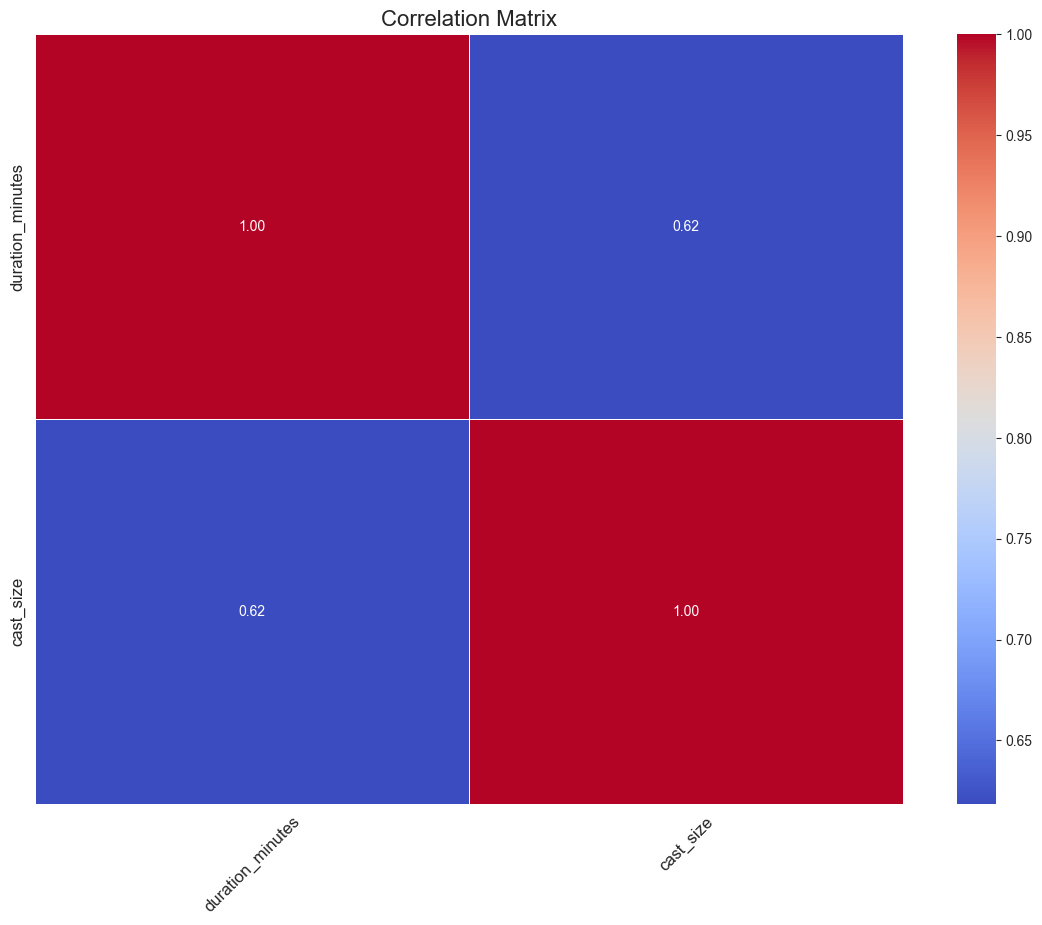

In [14]:
plt.figure(figsize=(14, 10))
corr_matrix = data[['duration_minutes', 'cast_size']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

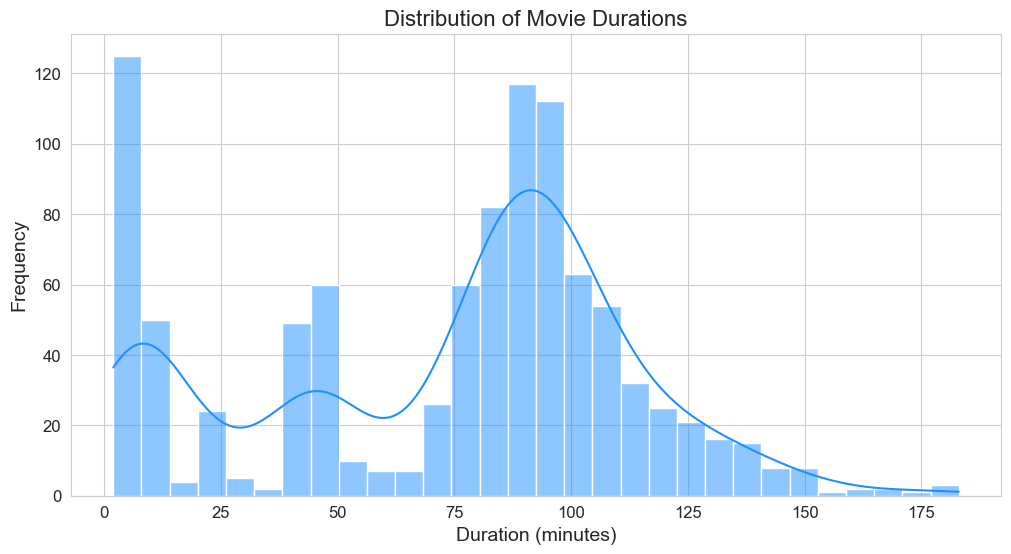

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(data[data['type'] == 'Movie']['duration_minutes'].
dropna(), bins=30, kde=True, color='dodgerblue')
plt.title('Distribution of Movie Durations', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

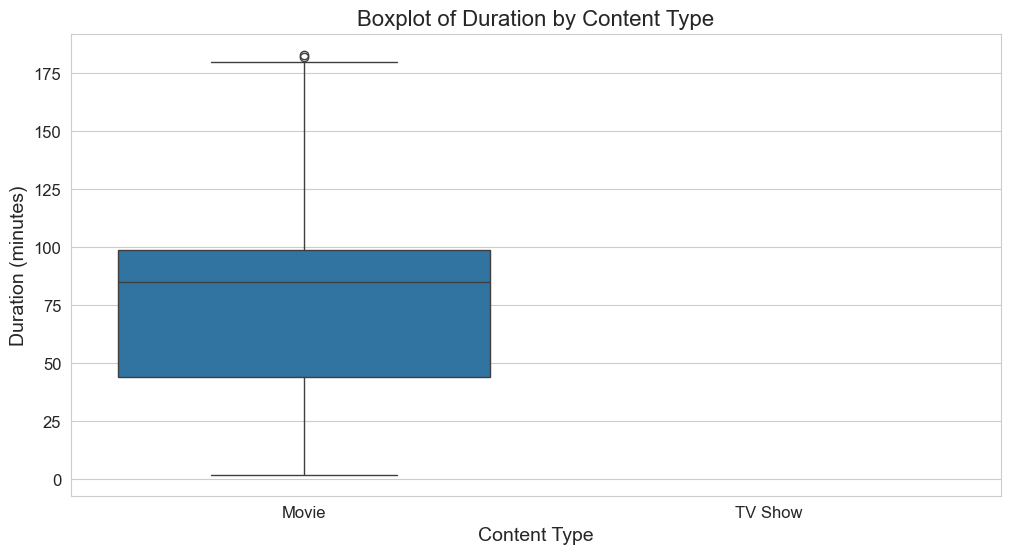

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='duration_minutes', data=data)
plt.title('Boxplot of Duration by Content Type', fontsize=16)
plt.xlabel('Content Type', fontsize=14)
plt.ylabel('Duration (minutes)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

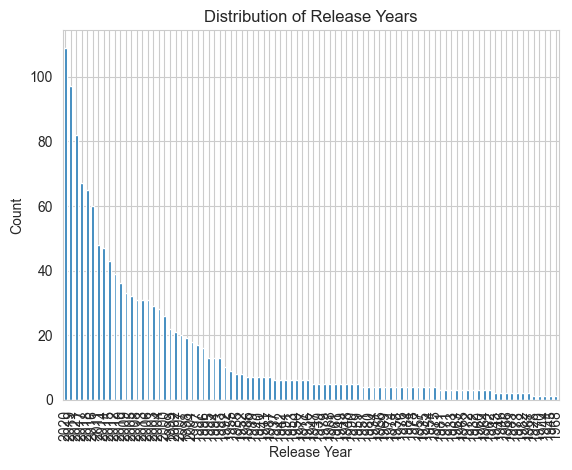

In [17]:
data['release_year'].value_counts().plot(kind='bar')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Distribution of Release Years')
plt.show()

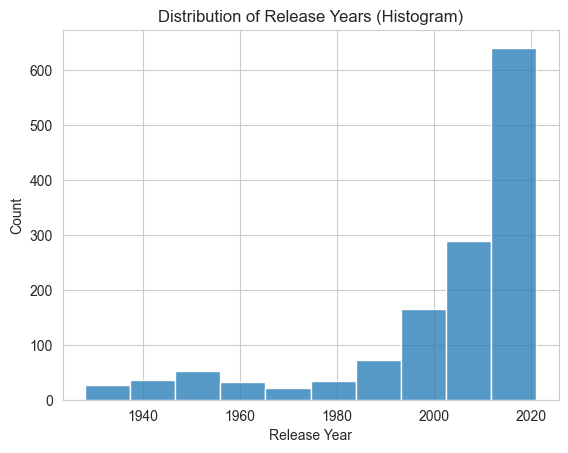

In [18]:
sns.histplot(data=data, x='release_year', bins=10)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Distribution of Release Years (Histogram)')
plt.show()

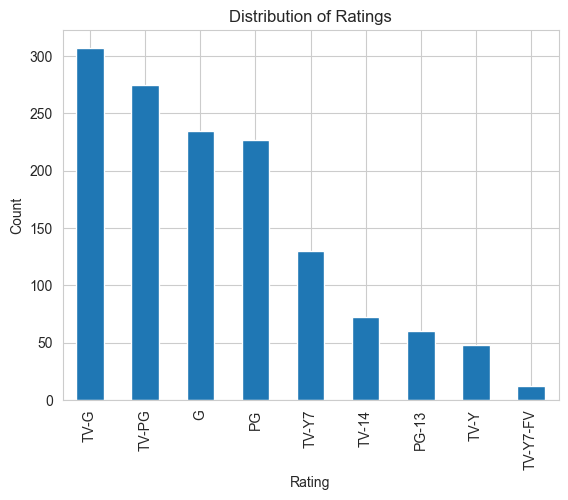

In [19]:
data['rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

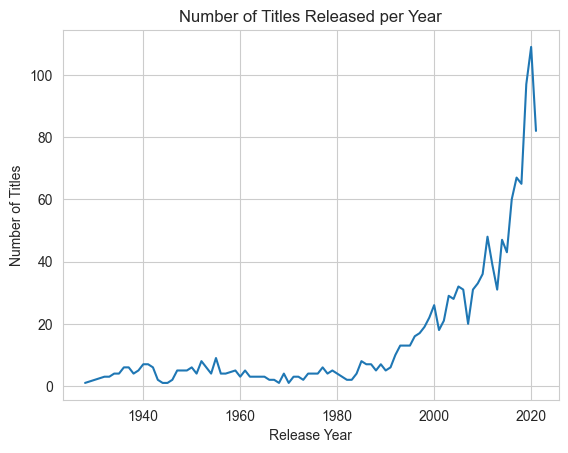

In [20]:
data.groupby('release_year')['title'].count().plot(kind='line')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Number of Titles Released per Year')
plt.show()